# 2.1 신경망과의 첫만남

In [0]:
# 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
# 신경망 구조
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
# 컴파일 단계
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2551 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1036 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0675 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0499 - accuracy: 0.9843
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0369 - accuracy: 0.9889


In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 47us/step
test_acc: 0.9794999957084656


# 2.2 신경망을 위한 데이터 표현

## 2.2.1 스칼라(0D 텐서)

In [29]:
import numpy as np
x = np.array(12)
x

array(12)

In [30]:
x.ndim

0

## 2.2.2 벡터(1D 텐서)

In [31]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [32]:
x.ndim

1

## 2.2.3 행렬(2D 텐서)

In [33]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

## 2.2.4 3D 텐서와 고차원 텐서

In [34]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
x.ndim

3


## 2.2.5 핵심속성

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
print(train_images.ndim)

3


In [37]:
print(train_images.shape)

(60000, 28, 28)


In [38]:
print(train_images.dtype)

uint8


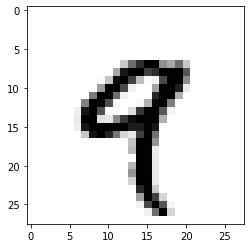

In [39]:
# 다섯 번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.6 넘파이로 텐서 조작하기

In [40]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [41]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [43]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [44]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## 2.2.7 배치 데이터

In [0]:
batch = train_images[:128]

In [0]:
batch = train_images[128:256]